**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

<div class="alert alert-block alert-info">
"All models are wrong, but some are useful." --- George E. P. Box
</div>

# Correlation

A correlation is performed when we want to investigate potential relationships between variables from the same sample. This does not mean that one variable explains the other, we arrive at that through the use of regression, as seen in Chapter 8. Like all statistical tests, correlation requires a series of assumptions as well:

* pair-wise data
* absence of outliers
* linearity
* normality of distribution
* homoscedasticity
* level (type) of measurement
  * Continuous data (Pearson correlation)
  * Ordinal data (Spearman correlation)

In order to investigate correlations in biological data lets load the `ecklonia` dataset.

In [4]:
# Load libraries
suppressMessages(library(tidyverse))
library(ggpubr)
library(corrplot)

# Load data
ecklonia <- read.csv("../data/ecklonia.csv")

We will also create a subsetted version of our data by removing all of the categorical variables. If we have a dataframe where each column represents pair-wise continuous/ordinal measurements with all of the other columns we may very quickly and easily perform a much wider range of correlation analyses.

In [5]:
ecklonia_sub <- ecklonia %>% 
  select(-species, - site, - ID)

## Pearson correlation

When the values we are comparing are continuous, we may use a Pearson test. This is the default and so requires little work on our end. The resulting statistic from this test is known as the correlation coefficient.

In [6]:
# Perform correlation analysis on two specific variables
  # Note that we do not need the final two arguments in this function to be stated
  # as they are the defaut settings.
  # They are only shown here to illustrate that they exist.
cor.test(x = ecklonia$stipe_length, ecklonia$frond_length,
    use = "everything", method = "pearson")


	Pearson's product-moment correlation

data:  ecklonia$stipe_length and ecklonia$frond_length
t = 4.2182, df = 24, p-value = 0.0003032
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3548169 0.8300525
sample estimates:
      cor 
0.6524911 


Above we have tested the correlation between the length of _Ecklonia maxima_ stipes and the length of their fronds. A perfect positive (negative) relationship would produce a value of 1 (-1), whereas no relationship would produce a value of 0. The result above, `cor = 0.65` is relatively strong. That being said, should our dataset contain multiple variables, as `ecklonia` does, we may investigate all of the correlations simultaneously. Remember that in order to do so we want to ensure that we may perform the same test on each of our paired variables. In this case we will use `ecklonia_sub` as we know that it contains only continuous data and so are appropriate for use with a Pearson test. By default R will use all of the data we give it and perform a Pearson test so we do not need to specify any further arguments. Note however that this will only output the correlation coefficients, and does not produce a full test of each correlation. This will however be useful for us to have just now.

In [8]:
ecklonia_pearson <- round(cor(ecklonia_sub), 2)
ecklonia_pearson

,stipe_length,stipe_diameter,frond_length,digits,primary_blade_width,primary_blade_length,stipe_mass,frond_mass,epiphyte_length
stipe_length,1.00,0.59,0.65,0.24,0.34,0.13,0.58,0.51,0.61
stipe_diameter,0.59,1.00,0.39,0.24,0.83,0.32,0.82,0.51,0.54
frond_length,0.65,0.39,1.00,0.36,0.28,-0.02,0.39,0.57,0.61
digits,0.24,0.24,0.36,1.00,0.14,0.10,0.07,0.28,0.05
primary_blade_width,0.34,0.83,0.28,0.14,1.00,0.34,0.83,0.36,0.41
primary_blade_length,0.13,0.32,-0.02,0.10,0.34,1.00,0.16,0.15,0.26
stipe_mass,0.58,0.82,0.39,0.07,0.83,0.16,1.00,0.47,0.51
frond_mass,0.51,0.51,0.57,0.28,0.36,0.15,0.47,1.00,0.44
epiphyte_length,0.61,0.54,0.61,0.05,0.41,0.26,0.51,0.44,1.00


<div class="alert alert-block alert-success">
<b>Task:</b> What does the outcome of this test show?
</div>
    
## Spearman rank correlation

When the data we want to compare are not continuous, but rather ordinal, we will need to use a Spearman test. This is not often a test one uses in biology because we tend to want to compare continuous data within categories. In the code below we will add a column of ordinal data to our `ecklonia` data to so that we may look at this test.

In [9]:
# Create ordinal data
ecklonia$length <- as.numeric(cut((ecklonia$stipe_length+ecklonia$frond_length), breaks = 3))

# Run test on any variable
cor.test(ecklonia$length, ecklonia$digits)


	Pearson's product-moment correlation

data:  ecklonia$length and ecklonia$digits
t = 1.4979, df = 24, p-value = 0.1472
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1070908  0.6105880
sample estimates:
    cor 
0.29239 


<div class="alert alert-block alert-success">
<b>Task:</b> How else might we use this?
</div>
    
## Kendall rank correlation

This test will work for both continuous and ordinal data. A sort of dealers choice of correlation tests. It's main purpose is to allow us to perform a correlation on non-normally distributed data. Let's look at the normality of our `ecklonia` variables and pull out those that are not normal in order to see how the results of this test may differ from our Pearson tests.

In [12]:
ecklonia_norm <- ecklonia_sub %>% 
  gather(key = "variable") %>% 
  group_by(variable) %>% 
  summarise(variable_norm = round(as.numeric(shapiro.test(value)[2]), 2))
ecklonia_norm

variable,variable_norm
<chr>,<dbl>
digits,0.07
epiphyte_length,0.63
frond_length,0.20
frond_mass,0.28
primary_blade_length,0.00
primary_blade_width,0.31
stipe_diameter,0.17
stipe_length,0.21
stipe_mass,0.82


From this analysis we may see that the values for primary blade length are not normally distributed. In order to make up for this violation of our assumption of normality we may use the Spearman test.

In [13]:
cor.test(ecklonia$primary_blade_length, ecklonia$primary_blade_width, method = "kendall")

Warning message in cor.test.default(ecklonia$primary_blade_length, ecklonia$primary_blade_width, :
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  ecklonia$primary_blade_length and ecklonia$primary_blade_width
z = 2.3601, p-value = 0.01827
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3426171 


## One panel visual

As is the case with everything else we have learned thus far, a good visualisation can go a long way to help us understand what the statistics are doing. Below we visualise the stipe length to frond length relationship.

`geom_smooth()` using formula 'y ~ x'



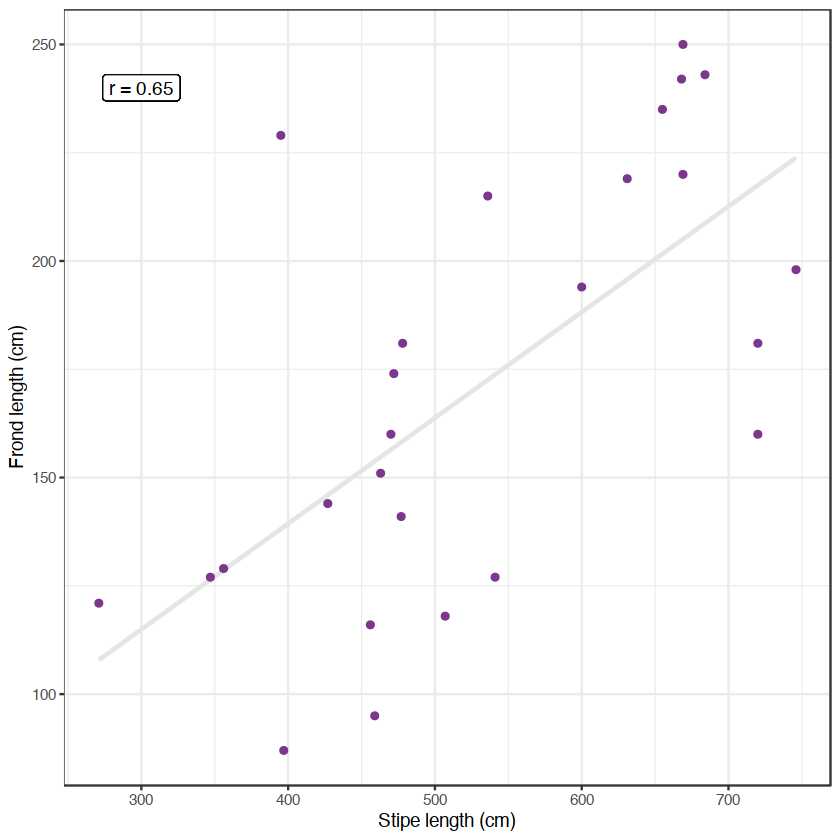

In [15]:
# Calculate Pearson r beforehand for plotting
r_print <- paste0("r = ", 
                  round(cor(x = ecklonia$stipe_length, ecklonia$frond_length),2))

# Then create a single panel showing one correlation
ggplot(data = ecklonia, aes(x = stipe_length, y = frond_length)) +
  geom_smooth(method = "lm", colour = "grey90", se = F) +
  geom_point(colour = "mediumorchid4") +
  geom_label(x = 300, y = 240, label = r_print) +
  labs(x = "Stipe length (cm)", y = "Frond length (cm)") +
  theme_bw()

**Figure:** Scatterplot showing relationship between _Ecklonia maxima_ stipe length (cm) and frond length (cm). The correlation coefficient (Pearson r) is shown in the top left corner. Note that the grey line running through the middle is a fitted linear model and is not generating the correlation value. Rather it is included to help visually demonstrate the strength of the relationship.

Just by eye-balling this scatterplot it should be clear that these data tend to increase at a roughly similar rate. Our Pearson r value is an indication of what that is.

## Multiple panel visual

But why stop at one panel? It is relatively straightforward to quickly plot correlation results for all of our variables in one go. In order to show which variables correlate most with which other variables all at once, without creating chaos, we will create what is known as a heat map. This visualisation uses a range of colours, usually blue to red, to demonstrate where more of something is. In this case, we use it to show where more correlation is occurring between morphometric properties of the kelp _Ecklonia maxima_.

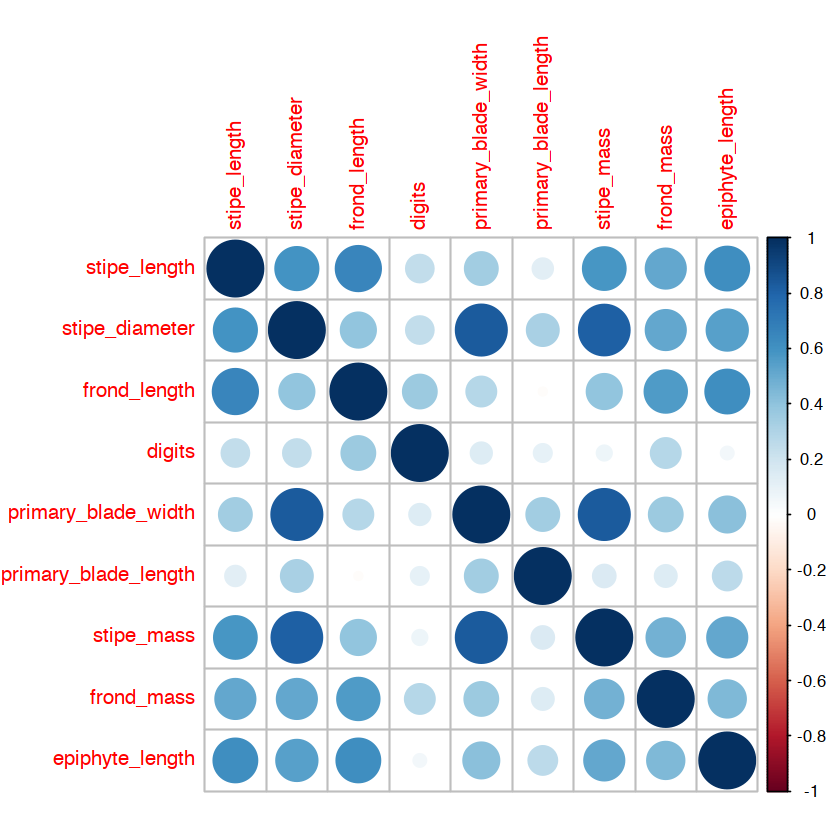

In [16]:
corrplot(ecklonia_pearson, method = "circle")

**Figure:** Correlation plot showing the strength of all correlations between all variables as a scale from red (negative) to blue (positive).

<div class="alert alert-block alert-success">
<b>Task:</b> What does the series of dark blue circles through the middle of this plot mean?
</div>
    
<div class="alert alert-block alert-success">
<b>Task:</b> Which morphometric properties correlate best/worst?
</div>

Slightly more involved, but much more useful, is the generation of a heat map using __`ggplot2`__.

## Exercises

<div class="alert alert-block alert-success">
<b>Exercise 1</b> Produce a heat map using __`ggplot2`__.
</div>